# Toward Predicting the Used Cars Price

## Step 1: `Data Cleaning`

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [4]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # Warning-causing lines of code here




## Loading the raw data

In [5]:
raw_data = pd.read_csv('Used Cars Price.csv')
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [46]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [47]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [48]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [49]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [50]:
#data_no_mv = data.dropna(axis=0)

#Drop missing values on rows

In [51]:
#data_no_mv.isnull().sum()

In [52]:
data_im = data.copy()

In [53]:
#necessary libraries:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler
#Next, let’s handle the numerical variables. 
#We’ll use KNN imputation for this:
# Initialize the KNN imputer
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Select only numeric columns
numeric_cols = data_im.select_dtypes(include=[np.number])

# Normalize our data before applying KNN as KNN is 
#sensitive to distances
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_cols)

# Fit and transform the data using KNNImputer
data_imputed = knn_imputer.fit_transform(data_scaled)

# Convert imputed data back to dataframe
imputed_df = pd.DataFrame(data_imputed, columns=numeric_cols.columns)

# Update the original dataframe
data_no_mv[numeric_cols.columns] = imputed_df

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Select only categorical columns
categorical_cols = data_no_mv.select_dtypes(include=[object])  
# Use 'object' instead of 'np.object'

# Fit and transform the data
data_imputed = imputer.fit_transform(categorical_cols)

# Convert imputed data back to dataframe
imputed_df = pd.DataFrame(data_imputed, columns=categorical_cols.columns)

# Update the original dataframe
data_no_mv[categorical_cols.columns] = imputed_df


In [54]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [55]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4345 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   float64
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   float64
dtypes: float64(4), object(4)
memory usage: 271.7+ KB


In [56]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4345.000000,4345,4345.000000,4345.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,0.067062,NaN,0.164528,0.022042,NaN,NaN,0.798937
std,NaN,0.091089,NaN,0.107863,0.050309,NaN,NaN,0.142960
min,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,0.021376,NaN,0.087755,0.012879,NaN,NaN,0.723404
50%,NaN,0.037074,NaN,0.158163,0.016098,NaN,NaN,0.829787
75%,NaN,0.073814,NaN,0.234694,0.024147,NaN,NaN,0.914894


### Exploring the PDFs

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/3204817182.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['Price'], shade = True)


<Axes: xlabel='Price', ylabel='Density'>

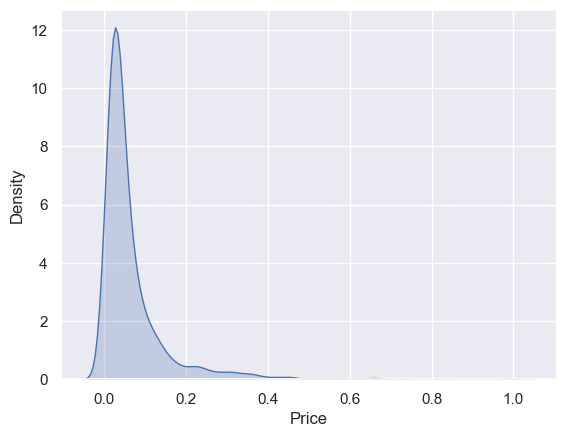

In [57]:
sns.kdeplot(data_no_mv['Price'], shade = True)
#his can help you understand the distribution of prices in your dataset

### Dealing with outliers

In [58]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

# this code is removing the top 1% of records with the highest prices 
#from the dataset and then providing descriptive statistics of the remaining data. 
#This is a common technique used in 
#data preprocessing to handle outliers which might skew the analysis or model training.
#sns.kdeplot(data_1['Price'], shade = True)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4299,4299.000000,4299,4299.000000,4299.000000,4299,4299,4299.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1643,NaN,NaN,2008,3901,NaN
mean,NaN,0.061172,NaN,0.166168,0.021821,NaN,NaN,0.797033
std,NaN,0.069710,NaN,0.107237,0.050523,NaN,NaN,0.142475
min,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,0.021376,NaN,0.090816,0.012074,NaN,NaN,0.723404
50%,NaN,0.036406,NaN,0.160204,0.016098,NaN,NaN,0.829787
75%,NaN,0.071476,NaN,0.234694,0.024147,NaN,NaN,0.914894


/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/1438372597.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_1['Price'], shade = True)


<Axes: xlabel='Price', ylabel='Density'>

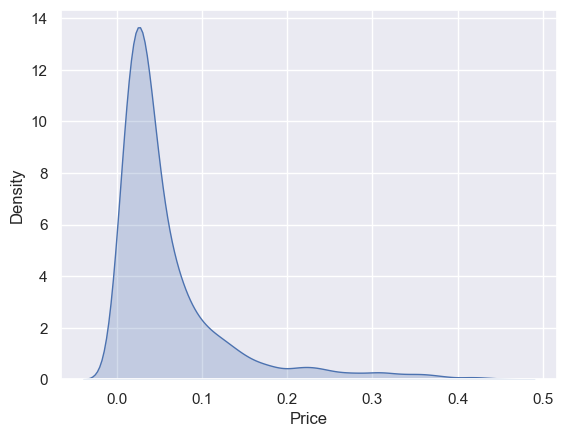

In [59]:
sns.kdeplot(data_1['Price'], shade = True)

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/93191074.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['Mileage'], shade = True)


<Axes: xlabel='Mileage', ylabel='Density'>

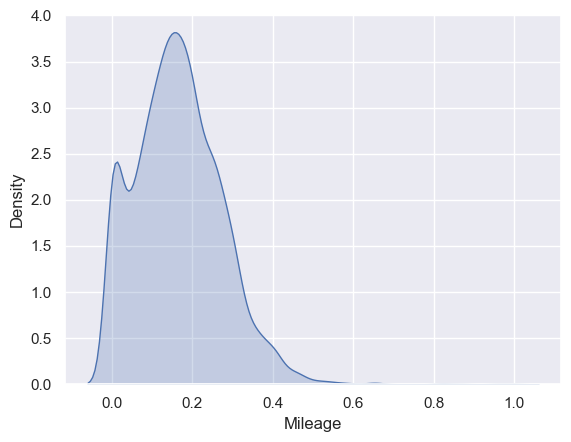

In [60]:
sns.kdeplot(data_no_mv['Mileage'], shade = True)

In [61]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/1092180832.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_2['Mileage'], shade = True)


<Axes: xlabel='Mileage', ylabel='Density'>

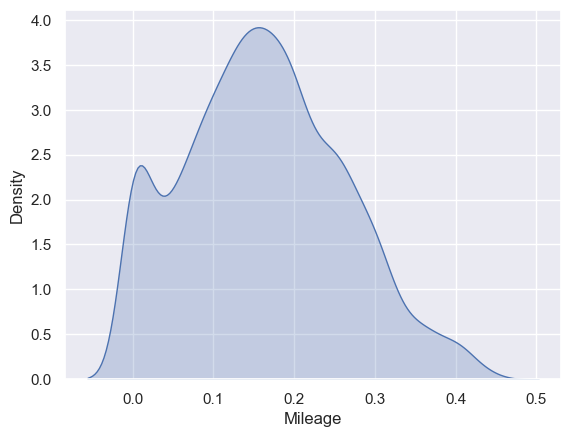

In [62]:
sns.kdeplot(data_2['Mileage'], shade = True)

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/1619735510.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['EngineV'], shade = True)


<Axes: xlabel='EngineV', ylabel='Density'>

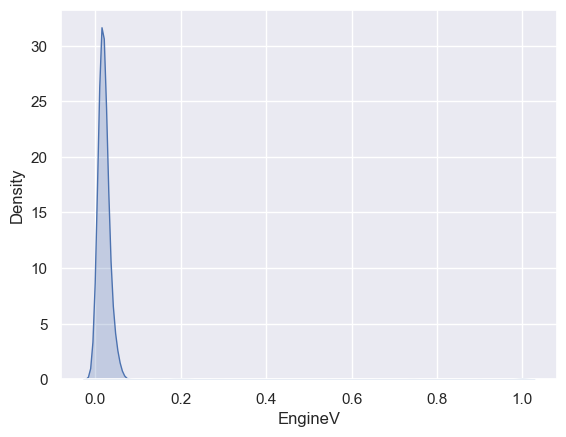

In [63]:
sns.kdeplot(data_no_mv['EngineV'], shade = True)

In [64]:
data_3 = data_2[data_2['EngineV']<6.5]


/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/638216859.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_3['EngineV'], shade = True)


<Axes: xlabel='EngineV', ylabel='Density'>

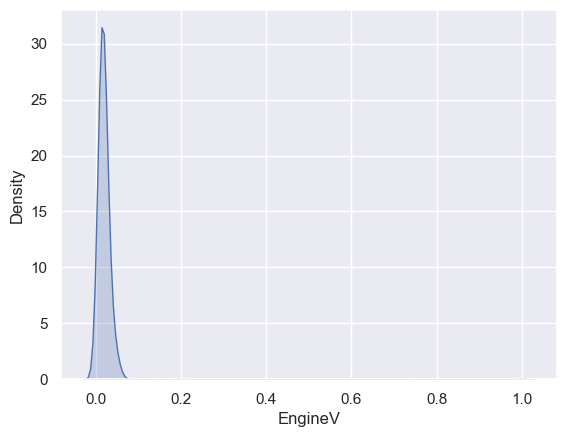

In [65]:
sns.kdeplot(data_3['EngineV'], shade = True)

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/1781950605.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['Year'], shade = True)


<Axes: xlabel='Year', ylabel='Density'>

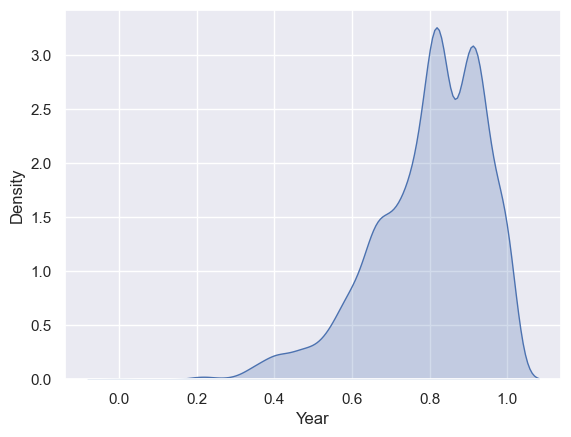

In [66]:
sns.kdeplot(data_no_mv['Year'], shade = True)

In [67]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_843/3808006289.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_4['Year'], shade = True)


<Axes: xlabel='Year', ylabel='Density'>

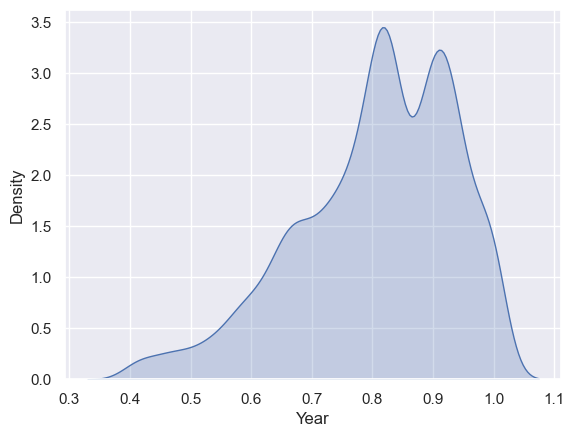

In [68]:
sns.kdeplot(data_4['Year'], shade = True)

In [69]:
data_cleaned = data_4.reset_index(drop=True)

In [70]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4197,4197.000000,4197,4197.000000,4197.000000,4197,4197,4197.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,907,NaN,1592,NaN,NaN,1966,3802,NaN
mean,NaN,0.062208,NaN,0.161280,0.021976,NaN,NaN,0.805256
std,NaN,0.070044,NaN,0.098780,0.051114,NaN,NaN,0.130813
min,NaN,0.000668,NaN,0.000000,0.000000,NaN,NaN,0.404255
25%,NaN,0.022194,NaN,0.089796,0.012476,NaN,NaN,0.723404
50%,NaN,0.037408,NaN,0.158163,0.016098,NaN,NaN,0.829787
75%,NaN,0.073146,NaN,0.228571,0.024147,NaN,NaN,0.914894


## Step 2: Checking the `Regression Assumptions`

### 1- Linearity

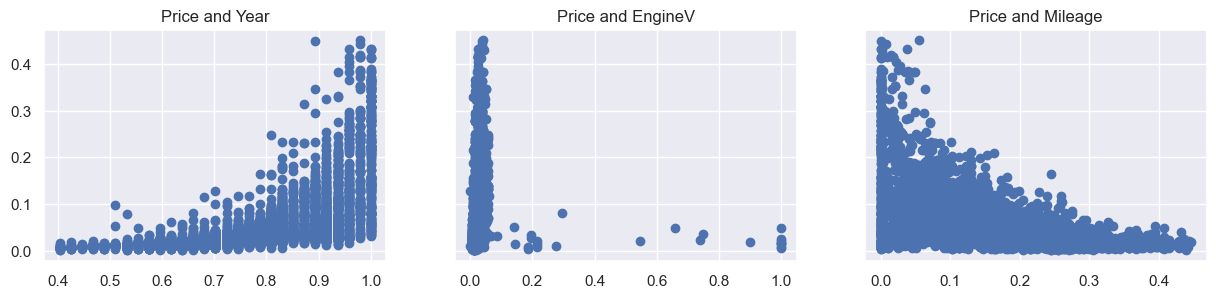

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [72]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,0.012024,sedan,0.282653,0.014086,Petrol,yes,0.468085,-4.420847
1,Mercedes-Benz,0.024382,van,0.435714,0.023141,Diesel,yes,0.638298,-3.713906
2,Mercedes-Benz,0.042418,sedan,0.365306,0.044270,Gas,yes,0.723404,-3.160178
3,Audi,0.074816,crossover,0.244898,0.036221,Petrol,yes,0.808511,-2.592720
4,Toyota,0.059118,crossover,0.122449,0.014086,Petrol,yes,0.893617,-2.828216
...,...,...,...,...,...,...,...,...,...
4192,Toyota,0.057782,sedan,0.035714,0.010061,Petrol,yes,0.957447,-2.851074
4193,Mercedes-Benz,0.415498,sedan,0.009184,0.024147,Diesel,yes,0.957447,-0.878278
4194,BMW,0.019706,sedan,0.001020,0.029178,Petrol,yes,0.638298,-3.926828
4195,Toyota,0.045424,sedan,0.031633,0.023141,Petrol,yes,0.957447,-3.091711


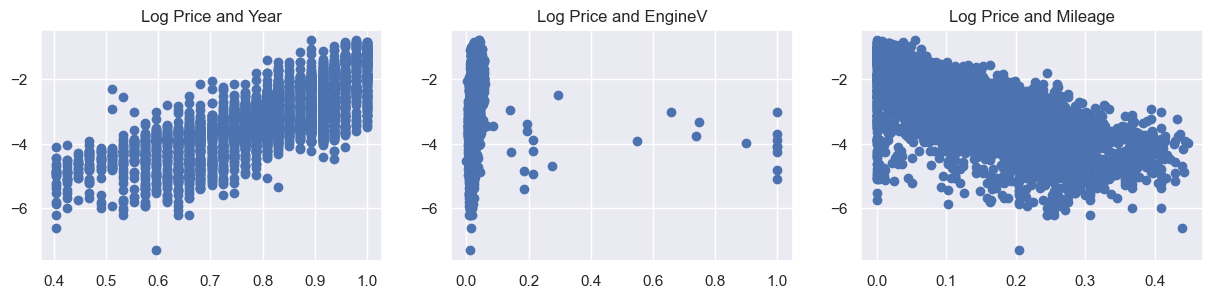

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize =(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

#this code is creating a figure with three scatter plots that show the relationships between ‘Price’ and ‘Year’, ‘Price’ and ‘EngineV’, and ‘Price’ and ‘Mileage’, respectively.

In [74]:
data_cleaned_2 = data_cleaned.drop(['Price'],axis=1)

In [75]:
data_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4197 non-null   object 
 1   Body          4197 non-null   object 
 2   Mileage       4197 non-null   float64
 3   EngineV       4197 non-null   float64
 4   Engine Type   4197 non-null   object 
 5   Registration  4197 non-null   object 
 6   Year          4197 non-null   float64
 7   log_price     4197 non-null   float64
dtypes: float64(4), object(4)
memory usage: 262.4+ KB


### 2- Normality and Homoscedasticity
Just check the above graphs. Since `intercept` has been included in our model, so the mean of error is ZERO.

In [93]:
data_N_H = data_cleaned.copy()

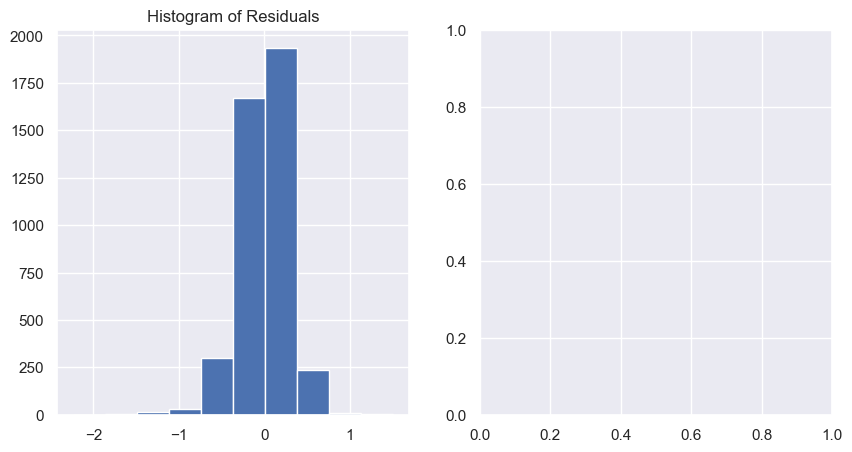

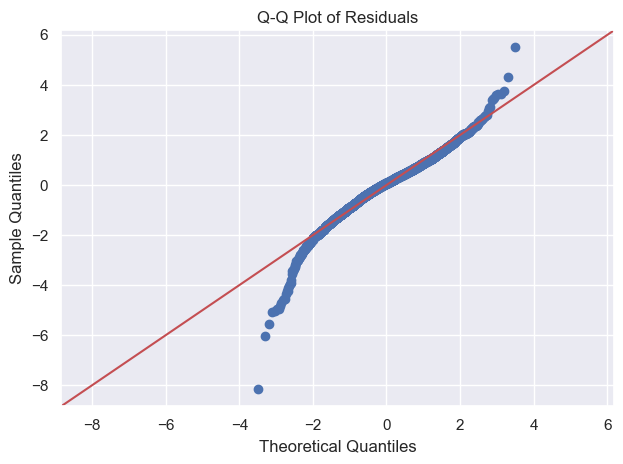

Shapiro-Wilk test p-value = 1.777852638895508e-30


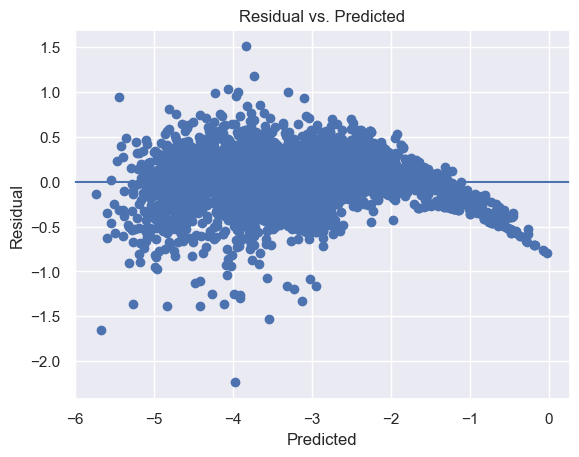

Breusch-Pagan test p-value = 2.2280080333117187e-43


In [94]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'data_cleaned' is  DataFrame
# Convert categorical variables to dummy variables
data_N_H = pd.get_dummies(data_N_H, drop_first=True)

# Define 'y' as your target variable and 'X' as your matrix of predictors
y = data_N_H['log_price']
X = data_N_H.drop('log_price', axis=1)

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Get the residuals
residuals = model.resid

# Check Normality of Residuals with a histogram and a Q-Q plot
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(residuals)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
_, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value = {p_value}')

# Check Homoscedasticity
# Plot the residuals
plt.scatter(model.predict(), residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Breusch-Pagan test for homoscedasticity
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan test p-value = {p_value}')


### 3- No Autocorrelation
We should not be worry, because our data is not a time series data or a panel data.

### 4- No Multicollinearity
#### VIF (Variance Inflation Factor) and its application in detecting `Multicollinearity`

#### If VIF > 10, then multicollinearity is high and we should remove that item.

In [80]:
data_cleaned_2.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned_2[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["features"] = variables.columns

In [82]:
vif

,VIF,features
0,2.583165,Mileage
1,2.652231,Year
2,1.182709,EngineV


In [75]:
variance_inflation_factor?

In [84]:
data_no_multicollinearity = data_cleaned_2.drop(['Year'],axis=1)

In [85]:
variables.values

array([[0.28265306, 0.46808511, 0.01408592],
       [0.43571429, 0.63829787, 0.02314116],
       [0.36530612, 0.72340426, 0.04427005],
       ...,
       [0.00102041, 0.63829787, 0.02917799],
       [0.03163265, 0.95744681, 0.02314116],
       [0.12653061, 0.93617021, 0.01408592]])

In [86]:
variables.shape[1]

3

## Step 3: Create `dummy Variables`




### Now in what follows, we will create dummies by a simple code of Pandas

### Note that if we have N categories for a feature, we have to create N-1 dummies.

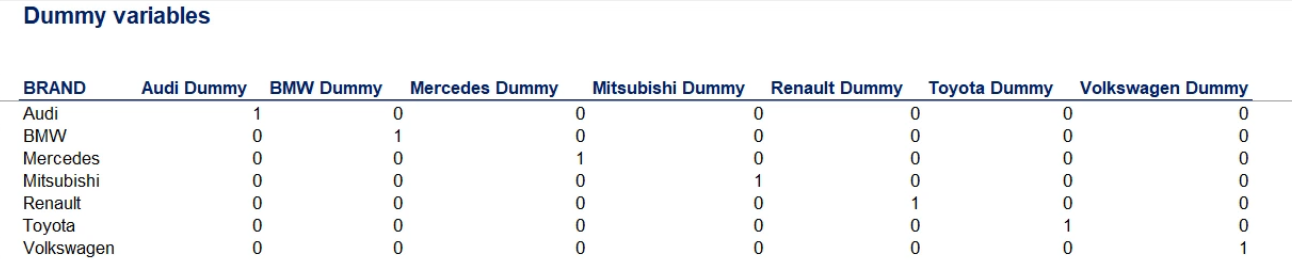

In [87]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,0.282653,0.014086,-4.420847,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,0.435714,0.023141,-3.713906,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,0.365306,0.044270,-3.160178,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,0.244898,0.036221,-2.592720,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,0.122449,0.014086,-2.828216,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,0.035714,0.010061,-2.851074,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4193,0.009184,0.024147,-0.878278,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4194,0.001020,0.029178,-3.926828,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4195,0.031633,0.023141,-3.091711,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True


In [88]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [89]:
# Now we create a list of our desired columns order as follows:

new_columns = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [91]:
data_preprocessed = data_with_dummies[new_columns]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,-4.420847,0.282653,0.014086,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,-3.713906,0.435714,0.023141,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,-3.160178,0.365306,0.044270,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,-2.592720,0.244898,0.036221,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,-2.828216,0.122449,0.014086,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,-2.851074,0.035714,0.010061,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4193,-0.878278,0.009184,0.024147,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4194,-3.926828,0.001020,0.029178,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4195,-3.091711,0.031633,0.023141,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True


## Step 4: Creating the `Linear Regression Model`

In [92]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [87]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [107]:
y_hat = reg.predict(x_train)

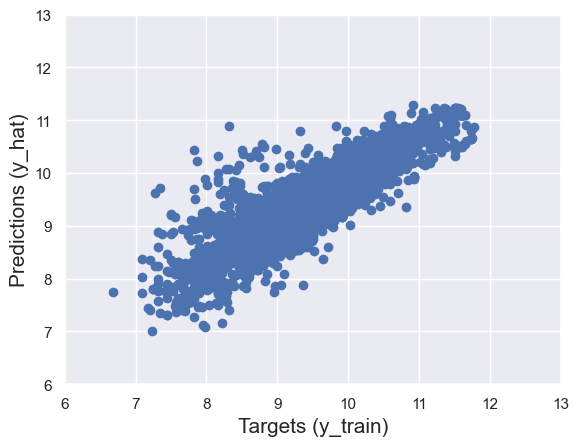

In [108]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=15)
plt.ylabel('Predictions (y_hat)',size=15)

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

#### Pay Attention Please:
An `ERROR` is the difference between the observed value and the true value (very often unobserved, generated by the data generating process (DGP)). Consider the example of `Height and Weight`. 

A `RESIDUAL` is the difference between the observed value and the predicted value (by the model).

/var/folders/6p/fpm3hcg930jg7g6k77xbqrhr0000gn/T/ipykernel_944/3864279410.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train - y_hat, shade = True)


Text(0.5, 1.0, 'Residuals PDF')

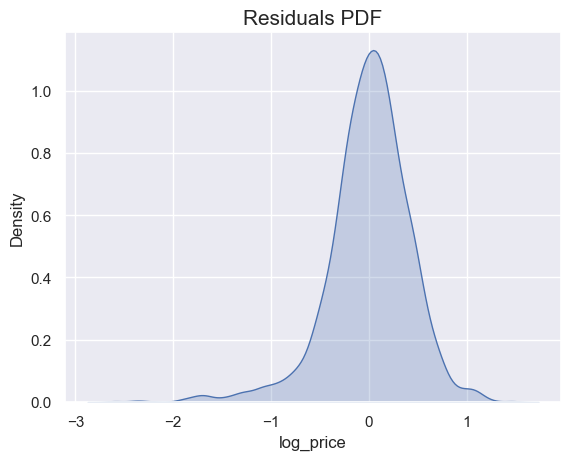

In [90]:
sns.kdeplot(y_train - y_hat, shade = True)
plt.title("Residuals PDF", size=15)

In [91]:
reg.score(x_train,y_train)

0.7546487921881218

#### Note:
The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 0.60 reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

In [92]:
reg.intercept_

9.329486241384904

In [93]:
reg.coef_

array([-0.00489596,  0.22677863,  0.03004208,  0.01435863, -0.5309696 ,
       -0.59582381, -0.19494044, -0.23923816, -0.56539335, -0.31903244,
       -0.36874884, -0.38857226, -0.42984803, -0.33010138, -0.16286015,
       -0.31466867,  1.07941322])

In [94]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])

reg_summary['Weights'] = reg.coef_

reg_summary

,Features,Weights
0,Mileage,-0.004896
1,EngineV,0.226779
2,Brand_BMW,0.030042
3,Brand_Mercedes-Benz,0.014359
4,Brand_Mitsubishi,-0.530970
5,Brand_Renault,-0.595824
6,Brand_Toyota,-0.194940
7,Brand_Volkswagen,-0.239238
8,Body_hatch,-0.565393
9,Body_other,-0.319032


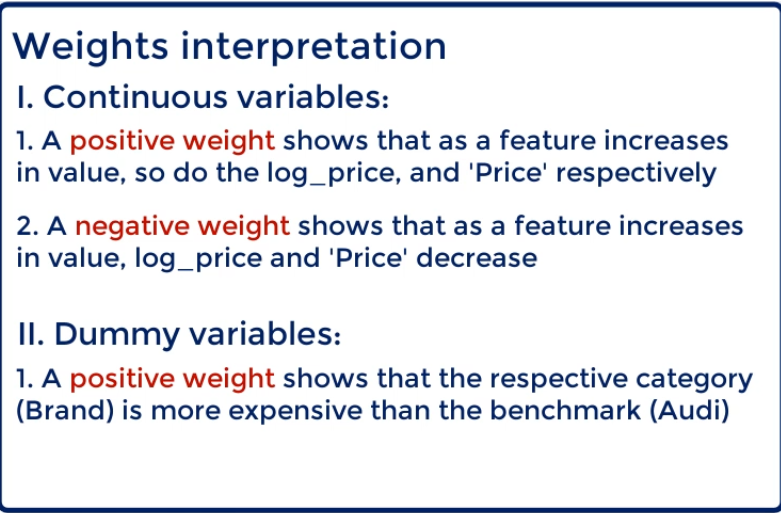

## Step 5: Testing our Model

In [95]:
y_hat_test = reg.predict(x_test)

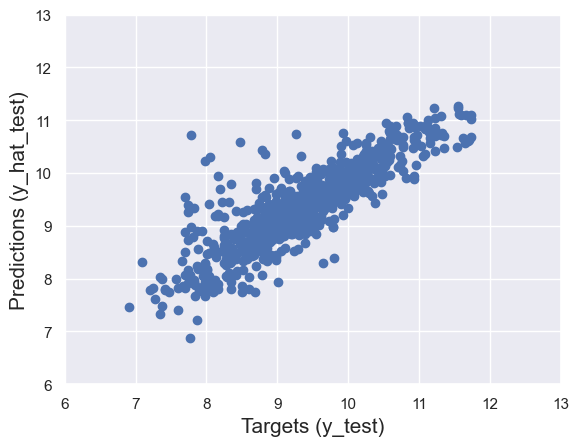

In [96]:
plt.scatter(y_test, y_hat_test)

plt.xlabel('Targets (y_test)',size=15)
plt.ylabel('Predictions (y_hat_test)',size=15)

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

#### Recall that we have: 

1: $ln (e^x) =x$

2: $e^{ln(x)} = x$

So,

$e^{ln (Price)}= Price$

In [97]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

df_performance.head()

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [98]:
df_performance['Target'] = np.exp(y_test)

df_performance.head()

,Prediction,Target
0,40419.308971,4200.0
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN


In [99]:
y_test.head()

2174    9.966462
1420    9.093807
2478    8.086410
1584    9.392662
952     8.594154
Name: log_price, dtype: float64

In [100]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [101]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


Percent Error = $\Big|(Target-Prediction)\times \frac{100}{Target}\Big| = \frac{Residual}{Target}\times 100$

See the following link for more details:


In [102]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

df_performance['Percent Error'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)

df_performance

,Prediction,Target,Residual,Percent Error
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [103]:
df_performance.describe()

,Prediction,Target,Residual,Percent Error
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [104]:
pd.options.display.max_rows = 999

df_performance.sort_values(by=['Percent Error'], inplace=True)

df_performance

,Prediction,Target,Residual,Percent Error
387,13602.753468,13600.00,-2.753468,0.020246
74,28889.063628,28900.00,10.936372,0.037842
314,35530.207664,35500.00,-30.207664,0.085092
336,11313.265936,11300.00,-13.265936,0.117398
425,2995.676139,3000.00,4.323861,0.144129
262,52180.113403,52055.25,-124.863403,0.239867
674,3107.506596,3100.00,-7.506596,0.242148
648,9675.565748,9700.00,24.434252,0.251900
79,21407.589940,21335.00,-72.589940,0.340239
313,9865.724471,9900.00,34.275529,0.346217


In [105]:
np.round(df_performance, 3)

,Prediction,Target,Residual,Percent Error
387,13602.753,13600.00,-2.753,0.020
74,28889.064,28900.00,10.936,0.038
314,35530.208,35500.00,-30.208,0.085
336,11313.266,11300.00,-13.266,0.117
425,2995.676,3000.00,4.324,0.144
262,52180.113,52055.25,-124.863,0.240
674,3107.507,3100.00,-7.507,0.242
648,9675.566,9700.00,24.434,0.252
79,21407.590,21335.00,-72.590,0.340
313,9865.724,9900.00,34.276,0.346


You can change the values of Target to int:
 
`df_performance['Target'] = df_performance['Target'].astype(int)`

You can also use of this code to get a rounded two decimal float number:

`pd.set_option('display.float_format', lambda x: '%.2f' % x)`

In [106]:
np.round(reg_summary, 2)

,Features,Weights
0,Mileage,-0.00
1,EngineV,0.23
2,Brand_BMW,0.03
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.53
5,Brand_Renault,-0.60
6,Brand_Toyota,-0.19
7,Brand_Volkswagen,-0.24
8,Body_hatch,-0.57
9,Body_other,-0.32


## Our Model

$\hat{y} = -0.47\times Mileage + 0.22\times EngineV + 0.01\times Brand\_BMW + \ldots + 0.31\times Registration\_yes$

### Time to see a real world example of such a regression model out there